In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
final_df=pd.read_csv("train_data-1611220940820.csv")
final_df.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [3]:
final_df.shape

(76529, 11)

In [4]:
final_df.describe(include="all")

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529,76529.000000,76529,76529,76529,76529.000000,76529,76529.000000,76529.000000
unique,NaN,NaN,6,NaN,9,1,4,NaN,75811,NaN,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN,NaN
freq,NaN,NaN,30538,NaN,36306,76529,45560,NaN,12,NaN,NaN
mean,6.940200e+14,1.247483e+07,NaN,58497.189105,NaN,NaN,NaN,132.724348,NaN,2.255707,0.002012
std,7.867885e+14,1.205878e+07,NaN,36740.216787,NaN,NaN,NaN,2350.110900,NaN,0.732174,0.044814
min,8.000000e+00,1.000000e+00,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,NaN,78890.000000,NaN,NaN,NaN,52.000000,NaN,2.000000,0.000000


In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [6]:
final_df["payment_method"].unique()

array(['sbi_atm_cum_debit_card', 'e_wallet_payments', 'other_debit_cards',
       'visa_master_debit_cards', 'visa_master_credit_cards',
       'unified_payments_interface'], dtype=object)

In [7]:
final_df["partner_category"].unique()

array(['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7',
       'cat_8', 'cat_9'], dtype=object)

In [8]:
final_df["device_type"].unique()

array(['android_devices', 'other_pcs', 'windows_pcs', 'ios_devices'],
      dtype=object)

In [9]:
final_df["partner_pricing_category"].unique()

array([2, 4, 1, 0])

In [10]:
final_df.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

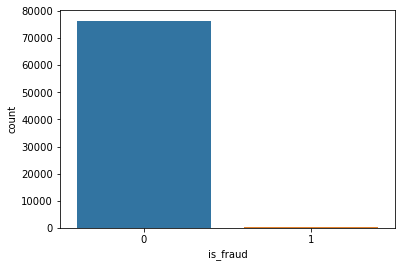

In [11]:
sns.countplot(x='is_fraud',data=final_df)

In [12]:
print('No Frauds', round(final_df['is_fraud'].value_counts()[0]/len(final_df) * 100,2), '% of the dataset')
print('Frauds', round(final_df['is_fraud'].value_counts()[1]/len(final_df) * 100,2), '% of the dataset')

No Frauds 99.8 % of the dataset
Frauds 0.2 % of the dataset


In [13]:
final_df["user_id"].value_counts()

53919649    3240
13205956    1656
418609      1530
1201216      623
16265089     622
            ... 
567009         1
20539024       1
21613201       1
26347689       1
27952369       1
Name: user_id, Length: 3594, dtype: int64

In [14]:
counts=final_df["user_id"].value_counts()
min_counts = counts[counts == counts.min()]
print(min_counts)

13198689    1
4575321     1
23571025    1
1882384     1
2085136     1
           ..
567009      1
20539024    1
21613201    1
26347689    1
27952369    1
Name: user_id, Length: 701, dtype: int64


In [15]:
counts.count()

3594

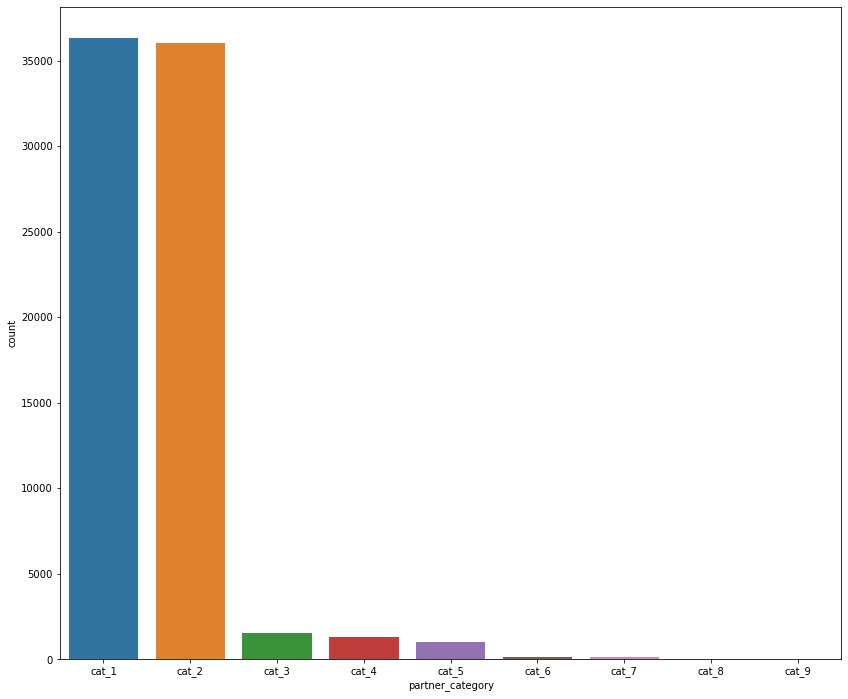

cat_1    36306
cat_2    36019
cat_3     1536
cat_4     1310
cat_5     1026
cat_7      165
cat_6      146
cat_8       19
cat_9        2
Name: partner_category, dtype: int64

In [16]:
plt.figure(figsize=(14,12))
sns.countplot(x="partner_category", data=final_df)
plt.show()

final_df.partner_category.value_counts()

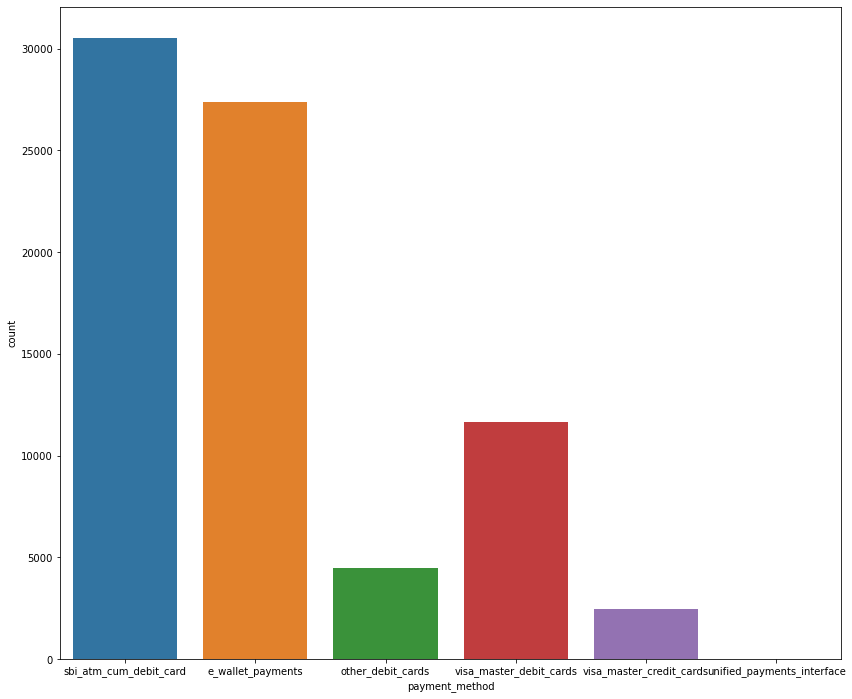

sbi_atm_cum_debit_card        30538
e_wallet_payments             27384
visa_master_debit_cards       11643
other_debit_cards              4495
visa_master_credit_cards       2454
unified_payments_interface       15
Name: payment_method, dtype: int64

In [17]:
plt.figure(figsize=(14,12))
sns.countplot(x="payment_method", data=final_df)
plt.show()

final_df.payment_method.value_counts()

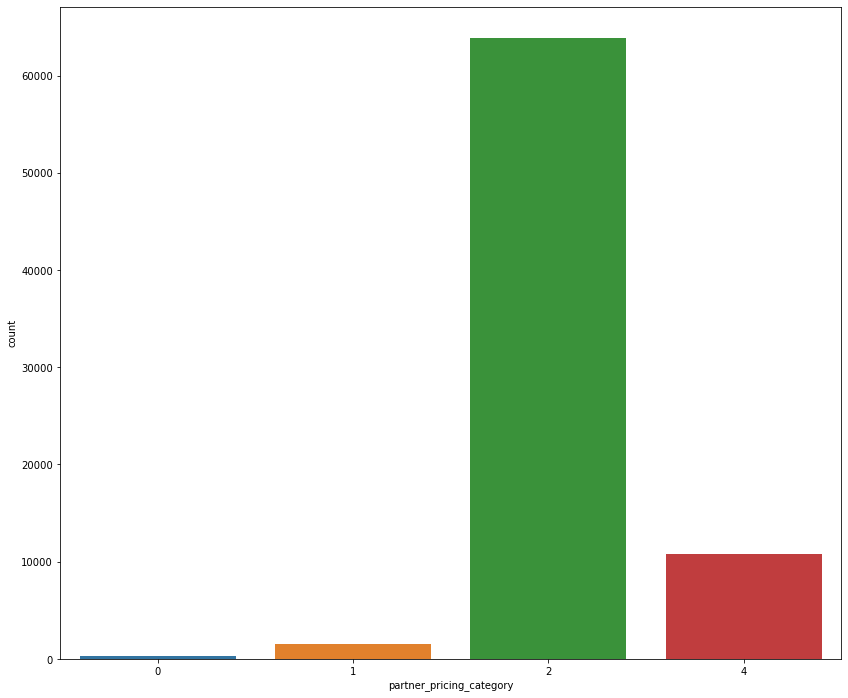

2    63899
4    10833
1     1497
0      300
Name: partner_pricing_category, dtype: int64

In [18]:
plt.figure(figsize=(14,12))
sns.countplot(x="partner_pricing_category", data=final_df)
plt.show()

final_df.partner_pricing_category.value_counts()

In [19]:
final_df.drop("transaction_number",axis=1,inplace=True)
final_df.drop("partner_id",axis=1,inplace=True)
final_df.drop("user_id",axis=1,inplace=True)
final_df.drop("country",axis=1,inplace=True)

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_method            76529 non-null  object 
 1   partner_category          76529 non-null  object 
 2   device_type               76529 non-null  object 
 3   money_transacted          76529 non-null  float64
 4   transaction_initiation    76529 non-null  object 
 5   partner_pricing_category  76529 non-null  int64  
 6   is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.1+ MB


In [21]:
col = ['payment_method', 'partner_category','device_type']
final_df[col] = final_df[col].astype('category')

In [22]:
final_df.dtypes

payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
transaction_initiation        object
partner_pricing_category       int64
is_fraud                       int64
dtype: object

Text(0, 0.5, 'is_fraud')

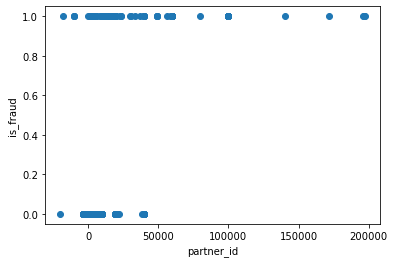

In [23]:
plt.scatter(final_df["money_transacted"],final_df["is_fraud"])
plt.xlabel("partner_id")
plt.ylabel("is_fraud")

In [24]:
final_df.corr()

,money_transacted,partner_pricing_category,is_fraud
money_transacted,1.000000,-0.066396,0.570388
partner_pricing_category,-0.066396,1.000000,-0.034002
is_fraud,0.570388,-0.034002,1.000000


In [25]:
final_df["trans_year"]=final_df["transaction_initiation"].apply(lambda x:np.int(x[0:4]))
final_df["trans_month"]=final_df["transaction_initiation"].apply(lambda x:np.int(x[5:7]))
final_df["trans_day"]=final_df["transaction_initiation"].apply(lambda x:np.int(x[8:10]))
final_df["trans_time"]=final_df["transaction_initiation"].apply(lambda x:(x[11:19]))

/var/folders/yn/360cvd014rl8mzj87q1ncrtr0000gn/T/ipykernel_3737/2100467312.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  final_df["trans_year"]=final_df["transaction_initiation"].apply(lambda x:np.int(x[0:4]))
/var/folders/yn/360cvd014rl8mzj87q1ncrtr0000gn/T/ipykernel_3737/2100467312.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spec

In [26]:
final_df.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,trans_year,trans_month,trans_day,trans_time
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,2016,11,15,19:16:12
1,e_wallet_payments,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,2017,1,11,09:25:33
2,e_wallet_payments,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,2016,12,7,07:58:09
3,other_debit_cards,cat_3,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0,2017,1,11,16:15:44
4,other_debit_cards,cat_1,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0,2016,11,16,17:04:42


In [27]:
final_df.drop("transaction_initiation",axis=1,inplace=True)
final_df.drop("trans_year",axis=1,inplace=True)
final_df.drop("trans_month",axis=1,inplace=True)

In [28]:
final_df.head()

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,trans_day,trans_time
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2,0,15,19:16:12
1,e_wallet_payments,cat_2,other_pcs,100.0,2,0,11,09:25:33
2,e_wallet_payments,cat_2,other_pcs,50.0,2,0,7,07:58:09
3,other_debit_cards,cat_3,other_pcs,1000.0,2,0,11,16:15:44
4,other_debit_cards,cat_1,other_pcs,200.0,2,0,16,17:04:42


In [29]:
final_df=pd.get_dummies(final_df,columns=['payment_method', 'partner_category',
       'device_type'],drop_first=True)
final_df
final_df.columns

Index(['money_transacted', 'partner_pricing_category', 'is_fraud', 'trans_day',
       'trans_time', 'payment_method_other_debit_cards',
       'payment_method_sbi_atm_cum_debit_card',
       'payment_method_unified_payments_interface',
       'payment_method_visa_master_credit_cards',
       'payment_method_visa_master_debit_cards', 'partner_category_cat_2',
       'partner_category_cat_3', 'partner_category_cat_4',
       'partner_category_cat_5', 'partner_category_cat_6',
       'partner_category_cat_7', 'partner_category_cat_8',
       'partner_category_cat_9', 'device_type_ios_devices',
       'device_type_other_pcs', 'device_type_windows_pcs'],
      dtype='object')

In [30]:
final_df.drop("partner_category_cat_9",axis=1,inplace=True)

In [31]:
final_df.head()

,money_transacted,partner_pricing_category,is_fraud,trans_day,trans_time,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,partner_category_cat_2,partner_category_cat_3,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs
0,-5.0,2,0,15,19:16:12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100.0,2,0,11,09:25:33,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,50.0,2,0,7,07:58:09,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1000.0,2,0,11,16:15:44,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,200.0,2,0,16,17:04:42,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
final_df['trans_hour']=final_df['trans_time'].str.split(':').str[0]
final_df['trans_min']=final_df['trans_time'].str.split(':').str[1]

In [33]:
final_df.head()

,money_transacted,partner_pricing_category,is_fraud,trans_day,trans_time,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,...,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs,trans_hour,trans_min
0,-5.0,2,0,15,19:16:12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,19,16
1,100.0,2,0,11,09:25:33,0,0,0,0,0,...,0,0,0,0,0,0,1,0,09,25
2,50.0,2,0,7,07:58:09,0,0,0,0,0,...,0,0,0,0,0,0,1,0,07,58
3,1000.0,2,0,11,16:15:44,1,0,0,0,0,...,0,0,0,0,0,0,1,0,16,15
4,200.0,2,0,16,17:04:42,1,0,0,0,0,...,0,0,0,0,0,0,1,0,17,04


In [34]:
final_df.shape

(76529, 22)

In [35]:
final_df.drop("trans_time",axis=1,inplace=True)

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   money_transacted                           76529 non-null  float64
 1   partner_pricing_category                   76529 non-null  int64  
 2   is_fraud                                   76529 non-null  int64  
 3   trans_day                                  76529 non-null  int64  
 4   payment_method_other_debit_cards           76529 non-null  uint8  
 5   payment_method_sbi_atm_cum_debit_card      76529 non-null  uint8  
 6   payment_method_unified_payments_interface  76529 non-null  uint8  
 7   payment_method_visa_master_credit_cards    76529 non-null  uint8  
 8   payment_method_visa_master_debit_cards     76529 non-null  uint8  
 9   partner_category_cat_2                     76529 non-null  uint8  
 10  partner_category_cat_3

In [37]:
from sklearn.model_selection import train_test_split
y=final_df['is_fraud']
X=final_df.drop('is_fraud',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61223, 20)
(15306, 20)
(61223,)
(15306,)


In [39]:
num_attr=X_train.select_dtypes(['int64','float64']).columns
#num_attr=final_df.select_dtypes(['int64','float64']).columns
num_attr

Index(['money_transacted', 'partner_pricing_category', 'trans_day'], dtype='object')

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
scaler.fit(X_train[num_attr])
#scaler.fit(final_df[num_attr])

StandardScaler()

In [42]:
X_train[num_attr]= scaler.fit_transform(X_train[num_attr])
X_test[num_attr]= scaler.fit_transform(X_test[num_attr])
print(X_train.shape)
print(X_test.shape)

(61223, 20)
(15306, 20)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [44]:
logisticRegr = LogisticRegression()

In [45]:
logisticRegr.fit(X_train,y_train)
#logisticRegr.fit(final_df)

/Users/middhladeekshitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
test_pred = logisticRegr.predict(X_test)

In [47]:
print(f1_score(y_test,test_pred))

0.5090909090909091


In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report( y_test,test_pred))
print(confusion_matrix(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15273
           1       0.64      0.42      0.51        33

    accuracy                           1.00     15306
   macro avg       0.82      0.71      0.75     15306
weighted avg       1.00      1.00      1.00     15306

[[15265     8]
 [   19    14]]


In [49]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [50]:
Classifier=DecisionTreeClassifier()
Classifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.4577205882352941, 0.9615384615384616, 'X[0] <= 3.947\ngini = 0.004\nsamples = 61223\nvalue = [61102, 121]'),
 Text(0.16544117647058823, 0.8846153846153846, 'X[0] <= -2.885\ngini = 0.0\nsamples = 61076\nvalue = [61061, 15]'),
 Text(0.13602941176470587, 0.8076923076923077, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1948529411764706, 0.8076923076923077, 'X[0] <= 0.745\ngini = 0.0\nsamples = 61074\nvalue = [61061, 13]'),
 Text(0.058823529411764705, 0.7307692307692307, 'X[0] <= 0.349\ngini = 0.0\nsamples = 60671\nvalue = [60669, 2]'),
 Text(0.029411764705882353, 0.6538461538461539, 'gini = 0.0\nsamples = 60114\nvalue = [60114, 0]'),
 Text(0.08823529411764706, 0.6538461538461539, 'X[18] <= 19.5\ngini = 0.007\nsamples = 557\nvalue = [555, 2]'),
 Text(0.058823529411764705, 0.5769230769230769, 'gini = 0.0\nsamples = 532\nvalue = [532, 0]'),
 Text(0.11764705882352941, 0.5769230769230769, 'X[19] <= 3.0\ngini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(0.08823529411764706, 0.5

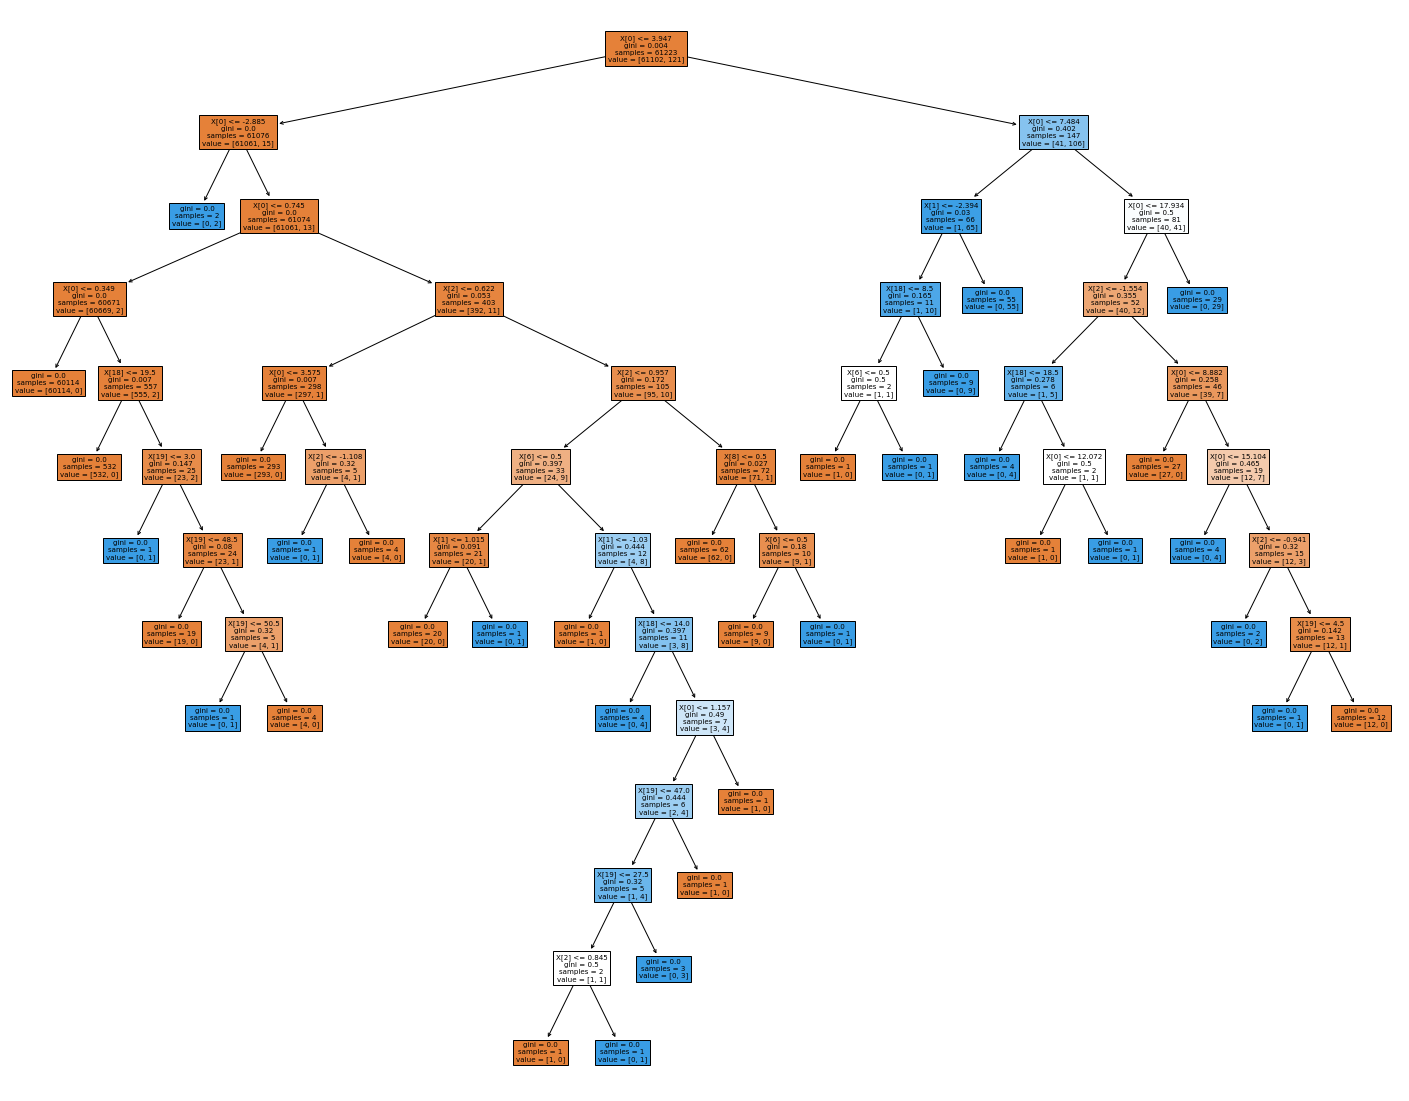

In [51]:
plt.figure(figsize=(25,20))
tree.plot_tree(Classifier,filled=True)

In [52]:
#train_pred1 = Classifier.predict(X_train)
test_pred1 = Classifier.predict(X_test)

In [53]:
print(f1_score(y_test,test_pred1))

0.7088607594936709


In [54]:
print(classification_report( y_test,test_pred1))
print(confusion_matrix(y_test,test_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15273
           1       0.61      0.85      0.71        33

    accuracy                           1.00     15306
   macro avg       0.80      0.92      0.85     15306
weighted avg       1.00      1.00      1.00     15306

[[15255    18]
 [    5    28]]


#HANDLING IMBALANCED DATA-upsampling

In [55]:
no_frauds = len(final_df[final_df['is_fraud'] == 1])
# indices of non fraud samples
non_fraud_indices = final_df[final_df.is_fraud == 0].index
#Random sample non fraud indices
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = final_df[final_df.is_fraud == 1].index
#Concat fraud indices with sample non-fraud ones
under_sample_indices = np.concatenate([fraud_indices,random_indices])
#Get Balance Dataframe
under_sample = final_df.loc[under_sample_indices]

In [56]:
X_under = under_sample.loc[:,under_sample.columns != 'is_fraud']
y_under = under_sample.loc[:,under_sample.columns == 'is_fraud']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)


In [57]:
X_under.shape
y_under.shape

(308, 1)

In [58]:
print('X_train dimensions: ', X_under_train.shape)
print('y_train dimensions: ', y_under_train.shape)
print('X_test dimensions:  ', X_under_test.shape)
print('y_test dimensions:  ', y_under_test.shape)

X_train dimensions:  (215, 20)
y_train dimensions:  (215, 1)
X_test dimensions:   (93, 20)
y_test dimensions:   (93, 1)


In [59]:
y_under_train.is_fraud.value_counts()

0    109
1    106
Name: is_fraud, dtype: int64

In [60]:
lr = LogisticRegression()

In [61]:
lr.fit(X_under_train, y_under_train)

/Users/middhladeekshitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/middhladeekshitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
test_pred1 = lr.predict(X_under_test)

In [63]:
print(f1_score(y_under_test,test_pred1))

0.9565217391304348


In [64]:
Class=DecisionTreeClassifier()
Class.fit(X_under_train, y_under_train)

DecisionTreeClassifier()

In [65]:
test_pred3 = Class.predict(X_under_test)

In [66]:
print(f1_score(y_under_test,test_pred3))

1.0


In [67]:
print(classification_report( y_under_test,test_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        48

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [68]:
from sklearn.utils import resample

In [69]:
train_data = pd.concat([X_train, y_train], axis=1) 

In [70]:
majority_class = train_data[train_data['is_fraud'] == 0]
minority_class = train_data[train_data['is_fraud'] == 1]

In [71]:
# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

In [72]:
# Combine the upsampled minority class with the majority class
upsampled_train_data = pd.concat([majority_class, minority_upsampled])

In [73]:
print("Upsampled Dataset Size:", len(upsampled_train_data))

Upsampled Dataset Size: 122204


In [74]:
# Split the upsampled data back into X_train and y_train
X_train = upsampled_train_data.drop('is_fraud', axis=1)
y_train = upsampled_train_data['is_fraud']

In [75]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
num_attr=X_train.select_dtypes(['int64','float64']).columns
#num_attr=final_df.select_dtypes(['int64','float64']).columns
num_attr

Index(['money_transacted', 'partner_pricing_category', 'trans_day'], dtype='object')

In [77]:
upsampled_train_data.shape

(122204, 21)

In [78]:
scaler.fit(X_train[num_attr])

StandardScaler()

In [79]:
X_train[num_attr]= scaler.fit_transform(X_train[num_attr])
X_test[num_attr]= scaler.fit_transform(X_test[num_attr])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(122204, 20)
(15306, 20)
(122204,)
(15306,)


In [80]:
logisticRegr.fit(X_train, y_train)

/Users/middhladeekshitha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
#train_pred1= logisticRegr.predict(X_train)
test_pred1 = logisticRegr.predict(X_test)

In [82]:
print(f1_score(y_test,test_pred1))

0.004102699841185812


In [83]:
print(classification_report( y_test,test_pred1))
print(confusion_matrix(y_test,test_pred1))

              precision    recall  f1-score   support

           0       0.99      0.01      0.03     15273
           1       0.00      0.94      0.00        33

    accuracy                           0.02     15306
   macro avg       0.50      0.48      0.02     15306
weighted avg       0.99      0.02      0.03     15306

[[  225 15048]
 [    2    31]]


In [84]:
Classifier=DecisionTreeClassifier()
Classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
#train_pred3 = Classifier.predict(X_train)
test_pred2 = Classifier.predict(X_test)

In [86]:
print(f1_score(y_test,test_pred2))

0.003924041763015907


In [87]:
print(classification_report( y_test,test_pred2))
print(confusion_matrix(y_test,test_pred2))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13     15273
           1       0.00      0.85      0.00        33

    accuracy                           0.07     15306
   macro avg       0.50      0.46      0.07     15306
weighted avg       0.99      0.07      0.13     15306

[[ 1063 14210]
 [    5    28]]


In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
#train_pred3=knn.predict(X_train)
#print("train f1 score",f1_score(y_train,train_pred3))
test_pred3=knn.predict(X_test)
print("test f1 score",f1_score(y_test,test_pred3))

test f1 score 0.3243243243243243


In [91]:
print(classification_report( y_test,test_pred3))
print(confusion_matrix(y_test,test_pred3))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15273
           1       0.21      0.73      0.32        33

    accuracy                           0.99     15306
   macro avg       0.60      0.86      0.66     15306
weighted avg       1.00      0.99      1.00     15306

[[15182    91]
 [    9    24]]


In [92]:
test_df=pd.read_csv("test_data-1611220982388.csv")
test_df.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


In [93]:
test_df.shape

(19133, 10)

In [94]:
test_df.describe(include="all")

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
count,1.913300e+04,1.913300e+04,19133,19133.000000,19133,19133,19133,19133.000000,19133,19133.000000
unique,NaN,NaN,6,NaN,8,1,4,NaN,19090,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN
freq,NaN,NaN,7651,NaN,9099,19133,11375,NaN,5,NaN
mean,7.037622e+14,1.261609e+07,NaN,58656.424084,NaN,NaN,NaN,140.886995,NaN,2.257043
std,7.946458e+14,1.228365e+07,NaN,36692.507399,NaN,NaN,NaN,2883.975048,NaN,0.735934
min,1.000000e+00,3.600000e+01,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000
25%,4.313645e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000
50%,3.585617e+14,9.922500e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000
75%,1.184018e+15,1.796064e+07,NaN,78890.000000,NaN,NaN,NaN,60.000000,NaN,2.000000


In [95]:
test_df.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
dtype: int64

In [96]:
test_df.drop("transaction_number",axis=1,inplace=True)
test_df.drop("partner_id",axis=1,inplace=True)
test_df.drop("user_id",axis=1,inplace=True)
test_df.drop("country",axis=1,inplace=True)

In [97]:
col = ['payment_method', 'partner_category','device_type']
test_df[col] = test_df[col].astype('category')

In [98]:
test_df.dtypes

payment_method              category
partner_category            category
device_type                 category
money_transacted             float64
transaction_initiation        object
partner_pricing_category       int64
dtype: object

In [99]:
test_df["trans_year"]=test_df["transaction_initiation"].apply(lambda x:np.int(x[0:4]))
test_df["trans_month"]=test_df["transaction_initiation"].apply(lambda x:np.int(x[5:7]))
test_df["trans_day"]=test_df["transaction_initiation"].apply(lambda x:np.int(x[8:10]))
test_df["trans_time"]=test_df["transaction_initiation"].apply(lambda x:(x[11:19]))

/var/folders/yn/360cvd014rl8mzj87q1ncrtr0000gn/T/ipykernel_3737/1648484916.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_df["trans_year"]=test_df["transaction_initiation"].apply(lambda x:np.int(x[0:4]))
/var/folders/yn/360cvd014rl8mzj87q1ncrtr0000gn/T/ipykernel_3737/1648484916.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specif

In [100]:
test_df.drop("transaction_initiation",axis=1,inplace=True)
test_df.drop("trans_year",axis=1,inplace=True)
test_df.drop("trans_month",axis=1,inplace=True)

In [101]:
test_df.partner_category.value_counts()

cat_1    9099
cat_2    9008
cat_3     384
cat_4     303
cat_5     253
cat_7      51
cat_6      29
cat_8       6
Name: partner_category, dtype: int64

In [102]:
test_df=pd.get_dummies(test_df,columns=['payment_method', 'partner_category',
       'device_type'],drop_first=True)
test_df
test_df.columns

Index(['money_transacted', 'partner_pricing_category', 'trans_day',
       'trans_time', 'payment_method_other_debit_cards',
       'payment_method_sbi_atm_cum_debit_card',
       'payment_method_unified_payments_interface',
       'payment_method_visa_master_credit_cards',
       'payment_method_visa_master_debit_cards', 'partner_category_cat_2',
       'partner_category_cat_3', 'partner_category_cat_4',
       'partner_category_cat_5', 'partner_category_cat_6',
       'partner_category_cat_7', 'partner_category_cat_8',
       'device_type_ios_devices', 'device_type_other_pcs',
       'device_type_windows_pcs'],
      dtype='object')

In [103]:
test_df['trans_hour']=test_df['trans_time'].str.split(':').str[0]
test_df['trans_min']=test_df['trans_time'].str.split(':').str[1]

In [104]:
test_df.drop("trans_time",axis=1,inplace=True)

In [105]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19133 entries, 0 to 19132
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   money_transacted                           19133 non-null  float64
 1   partner_pricing_category                   19133 non-null  int64  
 2   trans_day                                  19133 non-null  int64  
 3   payment_method_other_debit_cards           19133 non-null  uint8  
 4   payment_method_sbi_atm_cum_debit_card      19133 non-null  uint8  
 5   payment_method_unified_payments_interface  19133 non-null  uint8  
 6   payment_method_visa_master_credit_cards    19133 non-null  uint8  
 7   payment_method_visa_master_debit_cards     19133 non-null  uint8  
 8   partner_category_cat_2                     19133 non-null  uint8  
 9   partner_category_cat_3                     19133 non-null  uint8  
 10  partner_category_cat_4

In [106]:
test_df.shape

(19133, 20)

In [107]:
num_attr=test_df.select_dtypes(['int64','float64']).columns
#num_attr=final_df.select_dtypes(['int64','float64']).columns
num_attr

Index(['money_transacted', 'partner_pricing_category', 'trans_day'], dtype='object')

In [108]:
scaler.fit(test_df[num_attr])

StandardScaler()

In [109]:
#X_train[num_attr]= scaler.fit_transform(X_train[num_attr])
test_df[num_attr]= scaler.fit_transform(test_df[num_attr])
print(X_train.shape)
print(test_df.shape)
print(y_train.shape)
print(y_test.shape)

(122204, 20)
(19133, 20)
(122204,)
(15306,)


In [110]:
y_pred1= logisticRegr.predict(test_df)

In [111]:
y_pred1

array([1, 1, 1, ..., 1, 1, 1])

In [112]:
#upsampled_df.is_fraud.value_counts()
#test_pred.value_counts()
unique, counts = np.unique(y_pred1, return_counts=True)

dict(zip(unique, counts))

{0: 58, 1: 19075}

In [113]:
y_pred2 = Classifier.predict(test_df)

In [114]:
y_pred2

array([1, 1, 1, ..., 1, 0, 1])

In [115]:
unique, counts = np.unique(y_pred2, return_counts=True)

dict(zip(unique, counts))

{0: 1434, 1: 17699}

In [116]:
under_y_p=lr.predict(test_df)

In [117]:
unique, counts = np.unique(under_y_p, return_counts=True)

dict(zip(unique, counts))

{0: 19102, 1: 31}

In [121]:
under_y_p1= Class.predict(test_df)

In [122]:
unique, counts = np.unique(under_y_p1, return_counts=True)

dict(zip(unique, counts))

{0: 19133}

[Text(0.5769230769230769, 0.9166666666666666, 'X[0] <= 1820.0\ngini = 0.5\nsamples = 215\nvalue = [109, 106]'),
 Text(0.3076923076923077, 0.75, 'X[0] <= -9500.0\ngini = 0.069\nsamples = 112\nvalue = [108, 4]'),
 Text(0.23076923076923078, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.38461538461538464, 0.5833333333333334, 'X[0] <= 980.0\ngini = 0.053\nsamples = 111\nvalue = [108, 3]'),
 Text(0.23076923076923078, 0.4166666666666667, 'X[0] <= -20.05\ngini = 0.019\nsamples = 106\nvalue = [105, 1]'),
 Text(0.15384615384615385, 0.25, 'X[0] <= -60.05\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.23076923076923078, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(0.5384615384615384, 0.4166666666666667, 'X[18] <= 19.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.46

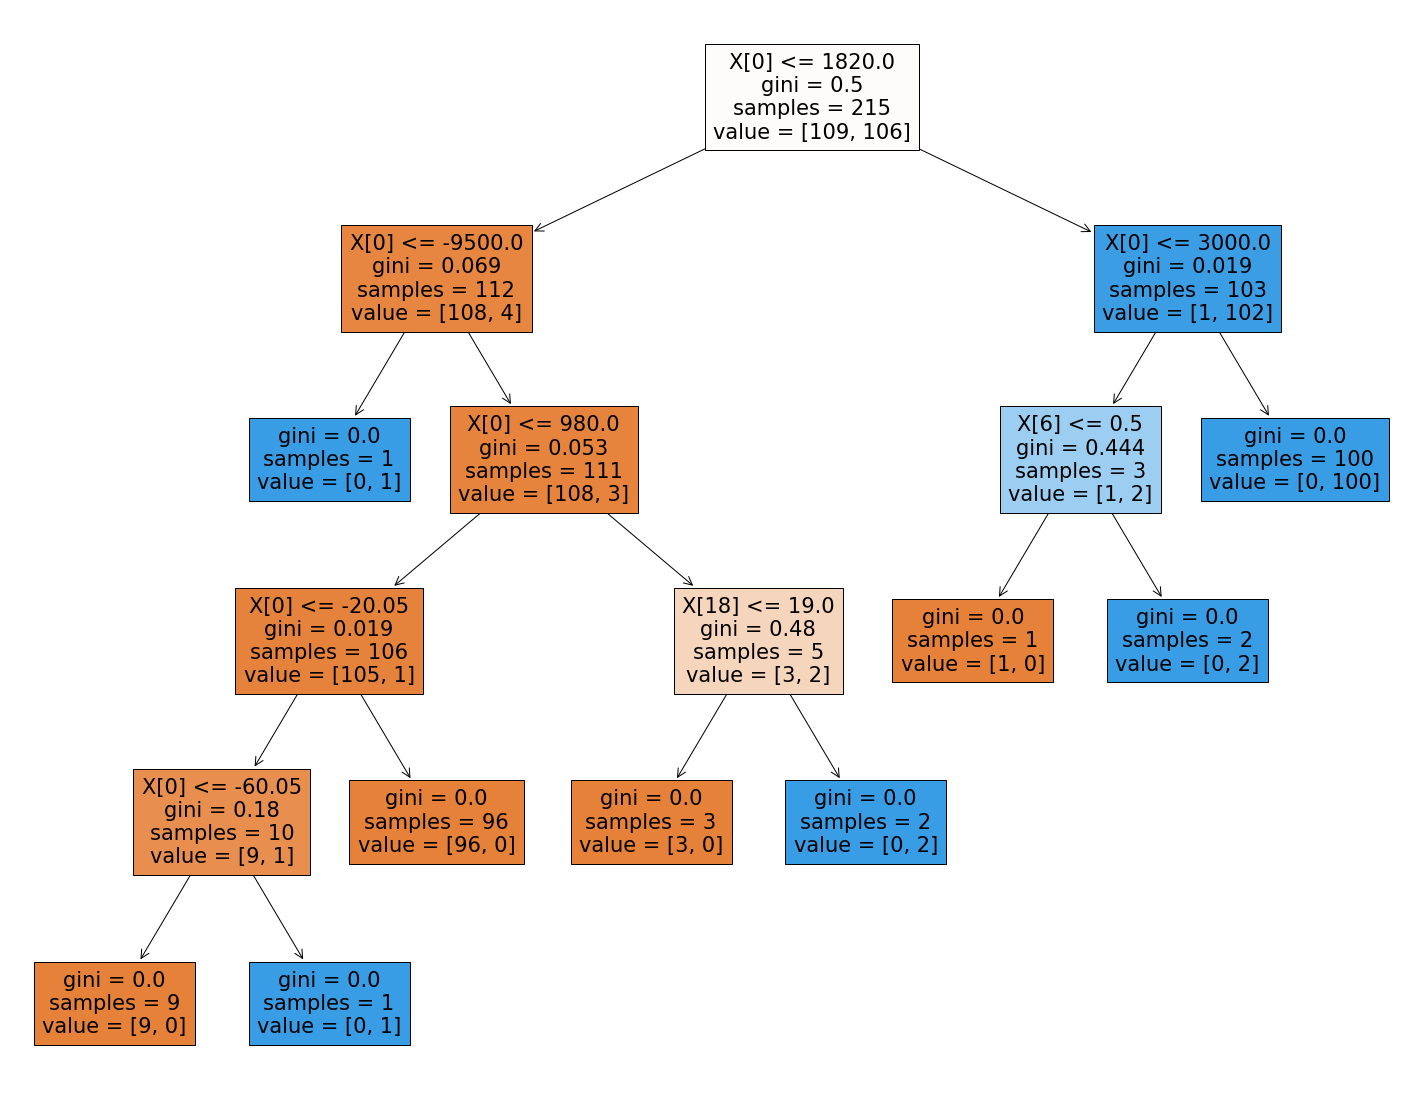

In [123]:
plt.figure(figsize=(25,20))
tree.plot_tree(Class,filled=True)